In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from io import StringIO
import nltk

In [3]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumeDataSet.head()
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
print("Displaying resume categories:\n")
print(resumeDataSet['Category'].unique())
print("Displaying resume categories and the count of each category:\n")
print(resumeDataSet['Category'].value_counts())

Displaying resume categories:

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Displaying resume categories and the count of each category:

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       3

In [5]:
import seaborn as sns

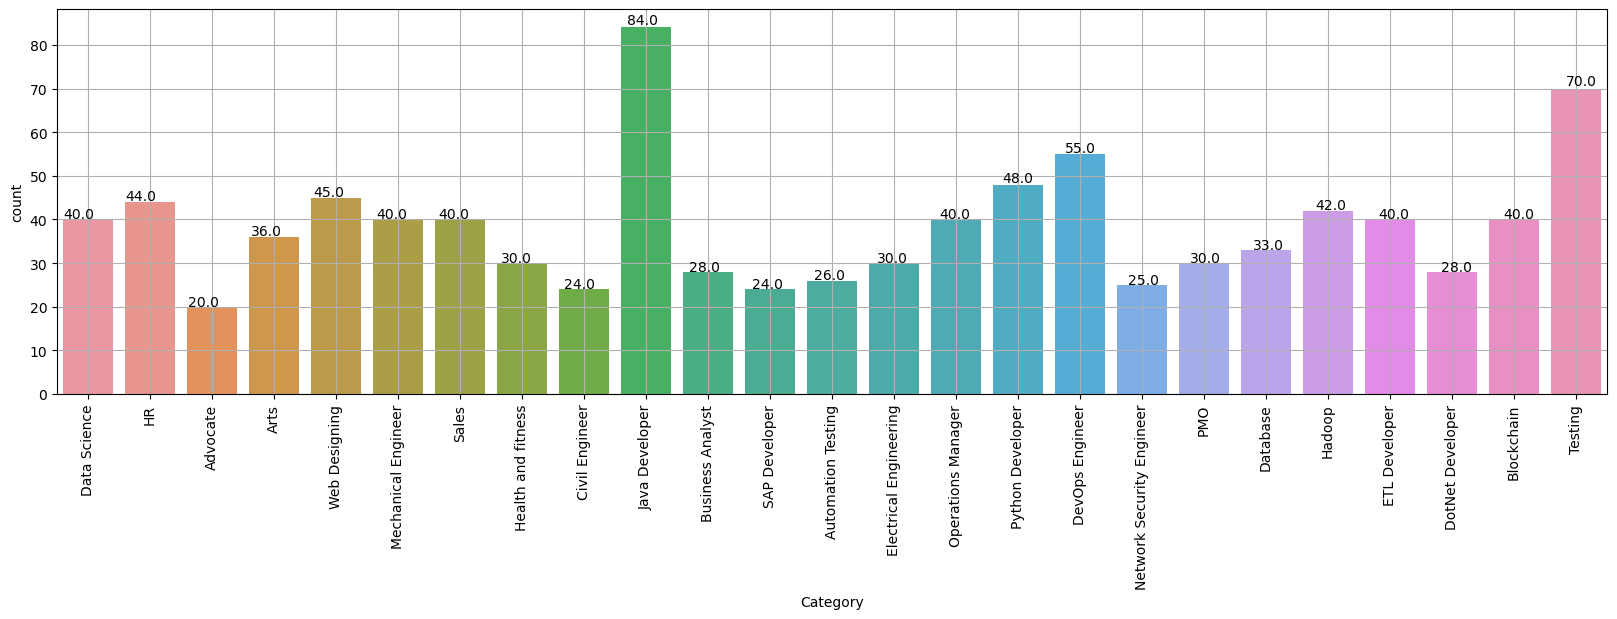

In [6]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.grid()

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels = resumeDataSet['Category'].unique()

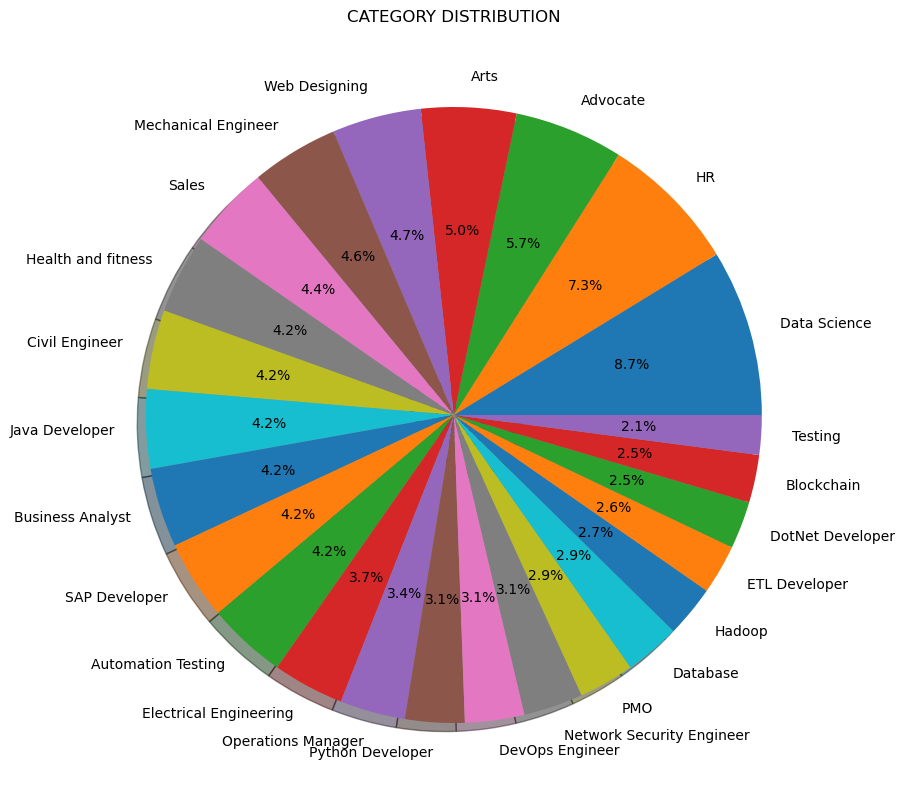

In [8]:
plt.figure(1, figsize=(22, 22))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [9]:
data = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
import re
import string

In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
def clean_text(text):
    text = text.lower()
    text = ''.join([word for word in text if not word.isdigit()])
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '  ', text)
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    ext = [word for word in text.split() if word not in stopwords]
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [12]:
data['Resume'] = data['Resume'].apply(lambda x: clean_text(x))
data.rename(columns={'Resume': 'Cleaned_Resume'}, inplace=True)
data.to_csv('cleaned_resume.csv', index=False)

In [13]:
resume = pd.read_csv('cleaned_resume.csv', encoding='utf-8')
from wordcloud import WordCloud

In [14]:
totalWords = []
Sentences = data['Cleaned_Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = clean_text(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in stopwords and word not in string.punctuation:
            totalWords.append(word)

In [15]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('exprience', 3829), ('company', 3536), ('project', 3361), ('months', 3283), ('description', 3122), ('details', 3096), ('data', 2137), ('management', 1989), ('team', 1922), ('maharashtra', 1449), ('system', 1395), ('year', 1340), ('testing', 1339), ('database', 1274), ('business', 1195), ('development', 1187), ('less', 1145), ('test', 1140), ('ltd', 1128), ('using', 1124), ('skill', 1101), ('january', 1090), ('engineering', 1055), ('application', 1035), ('developer', 1033), ('pune', 1025), ('java', 1015), ('client', 1015), ('work', 987), ('sql', 966), ('services', 951), ('skills', 950), ('software', 871), ('responsibilities', 856), ('pvt', 831), ('reports', 814), ('sales', 801), ('process', 792), ('requirements', 790), ('technologies', 764), ('operations', 761), ('server', 757), ('technical', 755), ('customer', 752), ('university', 751), ('india', 750), ('monthscompany', 746), ('working', 745), ('various', 727), ('design', 715)]


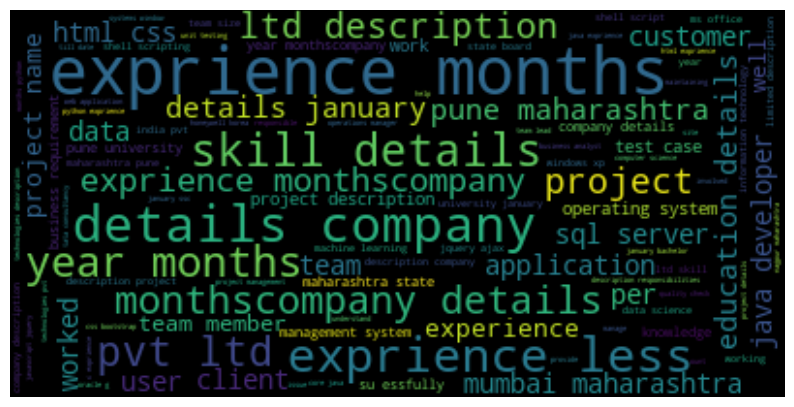

In [16]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [17]:
del resume

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
requiredText = data['Cleaned_Resume'].values
requiredTarget = data['Category'].values

In [20]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [21]:
print("Feature extraction completed...")

Feature extraction completed...


In [22]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.2,
                                                    shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(769, 7464)
(193, 7464)


In [23]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))
print("\nClassification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98

Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.80      0.80      0.80         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       0.89      1.00      0.94         8
                 Database       1.00      0.86      0.92         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00 